Hough circles ipython notebook

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import sys
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 15, 15

In [2]:
""" Do some common imports """
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
%matplotlib inline
from pylab import rcParams
from helpers import scaled_resize
from custom import *
rcParams['figure.figsize'] = 15, 15

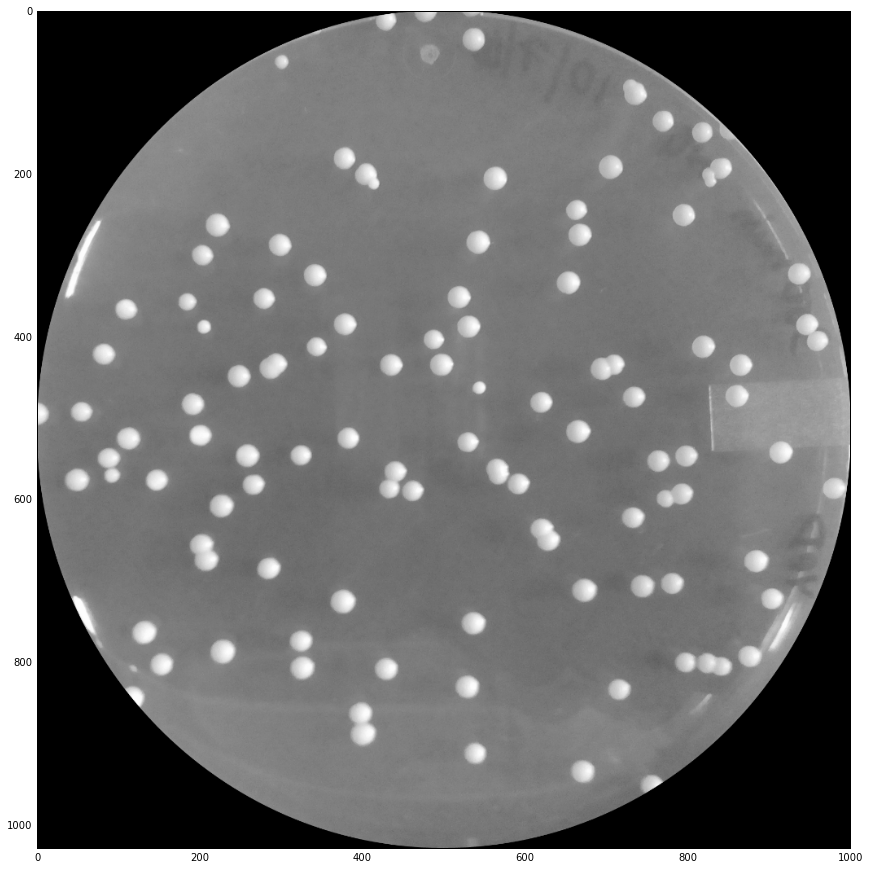

In [3]:
input_file = "/Users/shashwat/Downloads/cropped images/300 min.jpg"

img_gray = scaled_resize(cv2.imread(input_file, 0), 1000)
img = scaled_resize(cv2.imread(input_file), 1000)

plt.imshow(img_gray, cmap='gray')

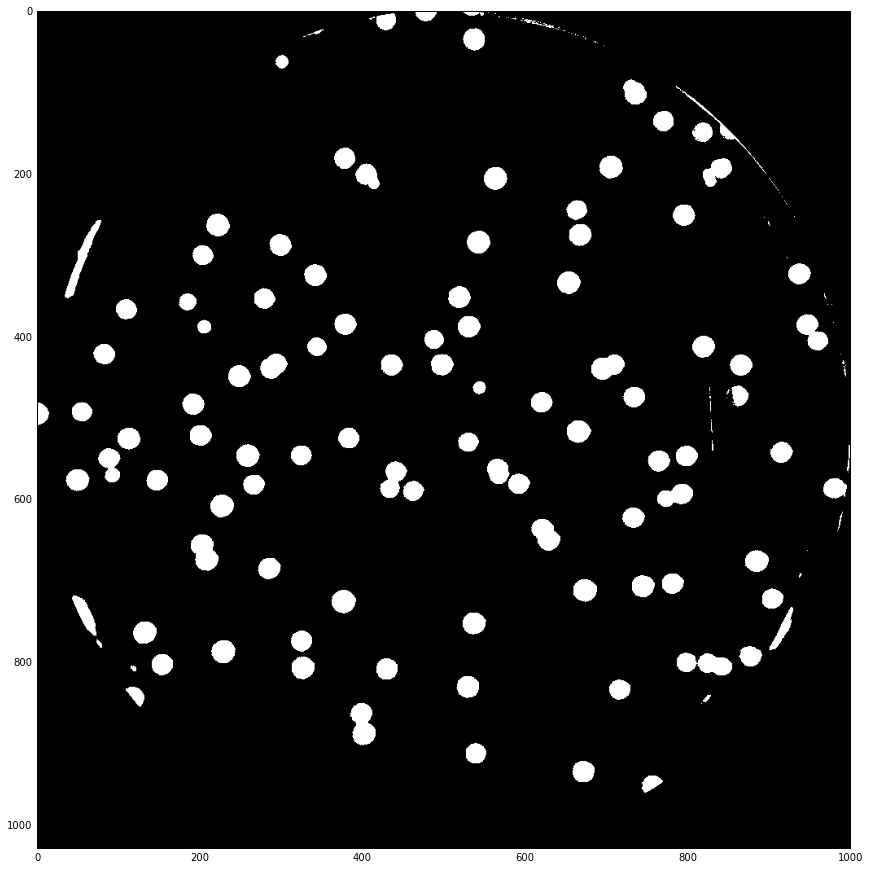

In [4]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(35,35))
tophat = cv2.morphologyEx(img_gray, cv2.MORPH_TOPHAT, kernel)

rng,img_gray = cv2.threshold(tophat,0,255,cv2.THRESH_OTSU)
plt.imshow(img_gray, cmap='gray')

Also let's try and compare the contour based approach

In [5]:
contours, hier = cv2.findContours(img_gray,mode=cv2.RETR_LIST, method=cv2.CHAIN_APPROX_NONE)
print len(contours)
#cv2.drawContours(img, contours, -1, 255, 2)

184


In [6]:
""" Apply gaussian blur transform procedure here """
#img_gray = cv2.GaussianBlur(img_gray, (9, 9), 2, 2)
#plt.imshow(img_gray, cmap='gray')

' Apply gaussian blur transform procedure here '

In [7]:
import math
contours, hier = cv2.findContours(img_gray,mode=cv2.RETR_LIST, method=cv2.CHAIN_APPROX_NONE)

cunts = []
circunts = []

for cnt in contours:
    perimeter = cv2.arcLength(cnt,True)
    if perimeter==0:
        continue
    area = cv2.contourArea(cnt)
    circ = (4*math.pi*area)/(perimeter**2)
    if circ>0.2 and area>20:
        cunts.append(cnt)
        
    if circ>0.8 and area>20:
        circunts.append(cnt)

print len(contours)
print len(cunts)
cv2.drawContours(img, cunts, -1, 255, 2)

184
100


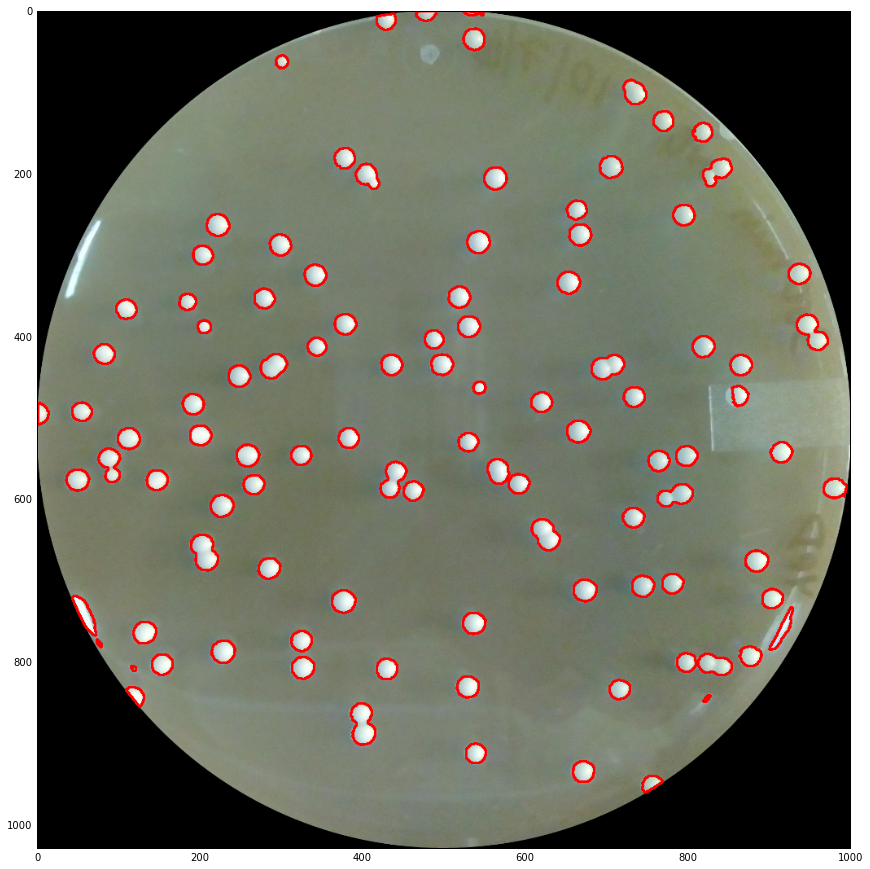

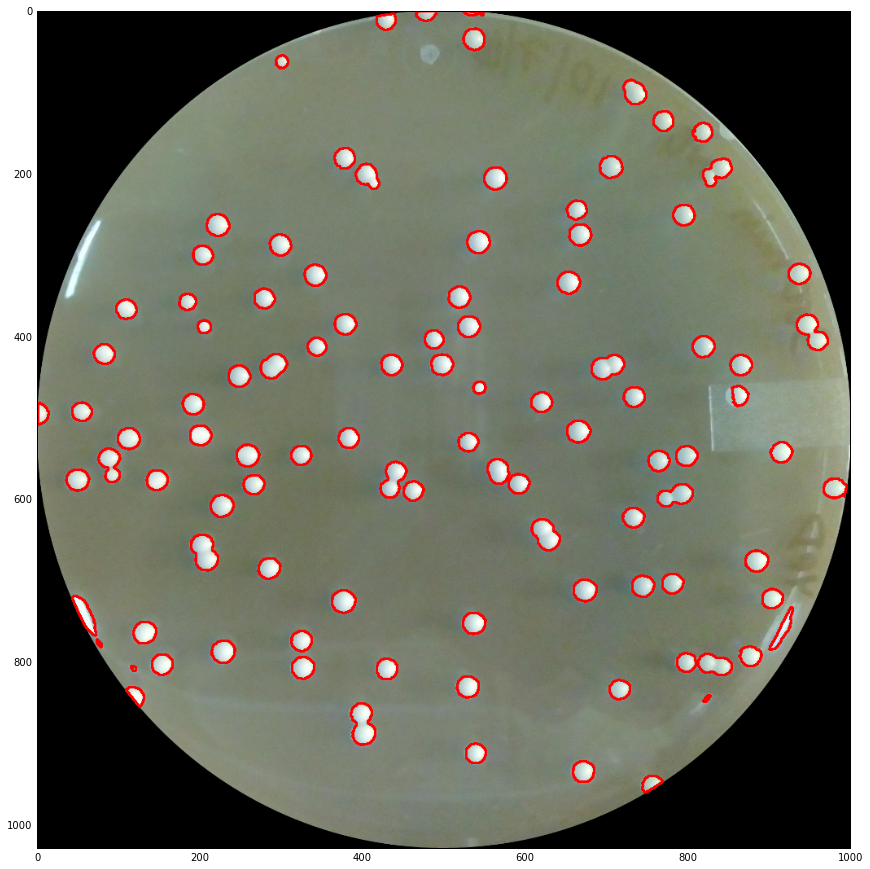

In [8]:
plt.figure()
plt.imshow(img, cmap='gray')
plt.figure()
plt.imshow(img, cmap='gray')

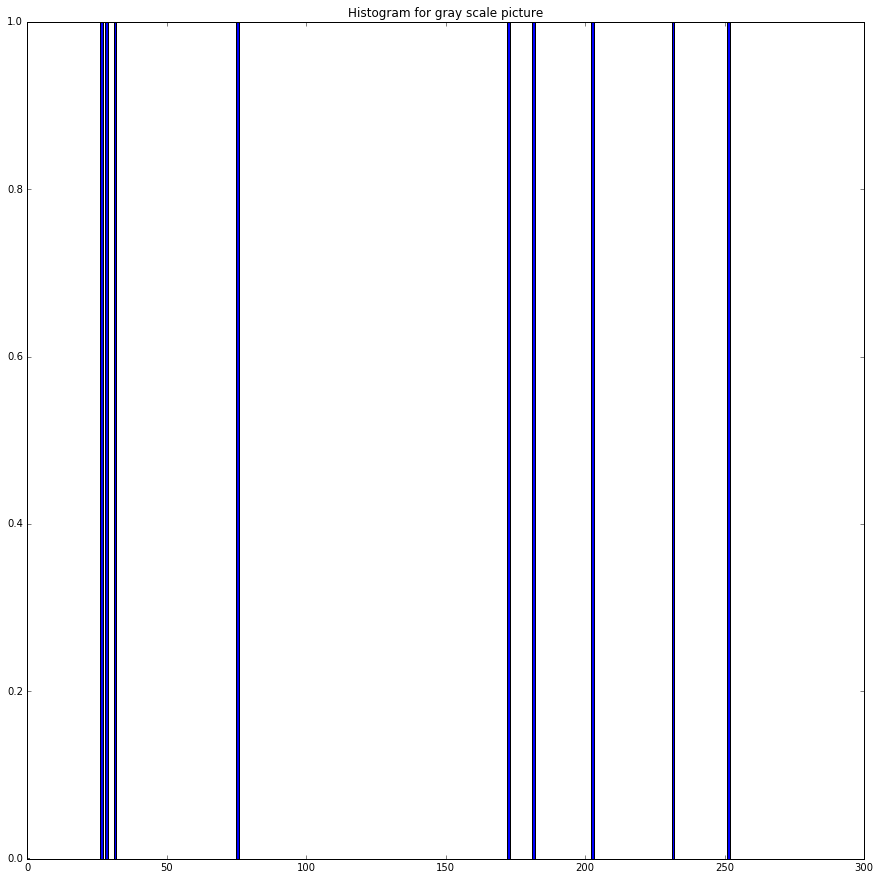

In [9]:
areas = np.array([cv2.contourArea(cnt) for cnt in cunts])
plt.hist(areas,256,[0,256])
plt.title('Histogram for gray scale picture')
plt.show()

5
12
11
6
5
6
155 81 74


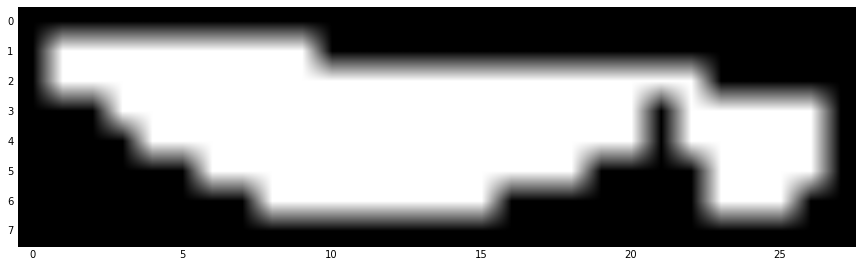

In [10]:
from custom import *

countall = 0

for idx, cn in enumerate(cunts):
    
    iii = cropContour(img, cunts, idx)
    cp = cv2.cvtColor(iii, cv2.COLOR_BGR2GRAY)
    count = colony_count(cp)
    countall += count
    if count>1:
        plt.imshow(iii)
        
    if count>4:
        plt.imshow(iii)
        print count

print countall, countall-len(circunts), len(circunts)
#cimg = np.zeros_like(img)
#cv2.drawContours(cimg, cunts, 2, color=(255,255,255), thickness=-1)
#x,y,w,h = cv2.boundingRect(cunts[2])
#cv2.rectangle(cimg, (x, y), (x+h, y+w), (0,255,0))
#plt.imshow(cimg)
#x,y,w,h